<a href="https://colab.research.google.com/github/rayrishiraj/CodeClause/blob/main/Movie_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PERFORMED BY: RISHIRAJ RAY**

PROBLEM: MOVIE RECOMMENDATION SYSTEM

PROCEDURE TO PERFORM THE OPERATION
1. IMPORTING LIBRARIES

2. LOADING DATA

3. DATA CONTENT

4. DATA PREPROCESSING

6. DATA VISUALIZING

7. MODEL TRAINING AND CREATING A PREDICTVE SYSTEM

8. CONCLUSION

In [2]:
#importing liraries
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
# loading the data from the csv file to a pandas dataframe
df = pd.read_csv('/content/tmdb_5000_movies.csv')

In [4]:
df

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [5]:
#appending the index column as it is not present
df["index"] = df.index

In [6]:
df.shape

(4803, 21)

In [7]:
#briefing the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [8]:
#understanding dataset columns
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'index'],
      dtype='object')

In [9]:
#Data pre-possing by dropping the unnecessary columns
cols_to_drop=['homepage','budget','original_language','vote_count',
              'production_companies','production_countries','release_date','revenue','runtime','spoken_languages',
 'status','status','spoken_languages']
df.drop(cols_to_drop,axis=1,inplace=True)

In [10]:
df.head(2)

,genres,id,keywords,original_title,overview,popularity,tagline,title,vote_average,index
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,Enter the World of Pandora.,Avatar,7.2,0
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,1


In [11]:
df.genres

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [12]:
import ast

Data Pre-processing

In [13]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name'])
    return L

In [14]:
df['genres'] = df['genres'].apply(convert)

In [15]:
df['keywords'] = df['keywords'].apply(convert)

In [146]:
df.genres

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [16]:
df.keywords

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4798    [united states–mexico barrier, legs, arms, pap...
4799                                                   []
4800    [date, love at first sight, narration, investi...
4801                                                   []
4802            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4803, dtype: object

In [18]:
# Function to collapse the list into a comma-separated string
def collapse(lst):
    return ','.join(lst)

In [19]:
df['genres'] = df['genres'].apply(collapse)
df['keywords'] = df['keywords'].apply(collapse)

In [20]:
df['genres'] = df['genres'].str.split(',').str[0]

In [21]:
df.genres

0            Action
1         Adventure
2            Action
3            Action
4            Action
           ...     
4798         Action
4799         Comedy
4800         Comedy
4801               
4802    Documentary
Name: genres, Length: 4803, dtype: object

In [22]:
df.keywords

0       culture clash,future,space war,space colony,so...
1       ocean,drug abuse,exotic island,east india trad...
2       spy,based on novel,secret agent,sequel,mi6,bri...
3       dc comics,crime fighter,terrorist,secret ident...
4       based on novel,mars,medallion,space travel,pri...
                              ...                        
4798    united states–mexico barrier,legs,arms,paper k...
4799                                                     
4800    date,love at first sight,narration,investigati...
4801                                                     
4802                 obsession,camcorder,crush,dream girl
Name: keywords, Length: 4803, dtype: object

Data Visualization

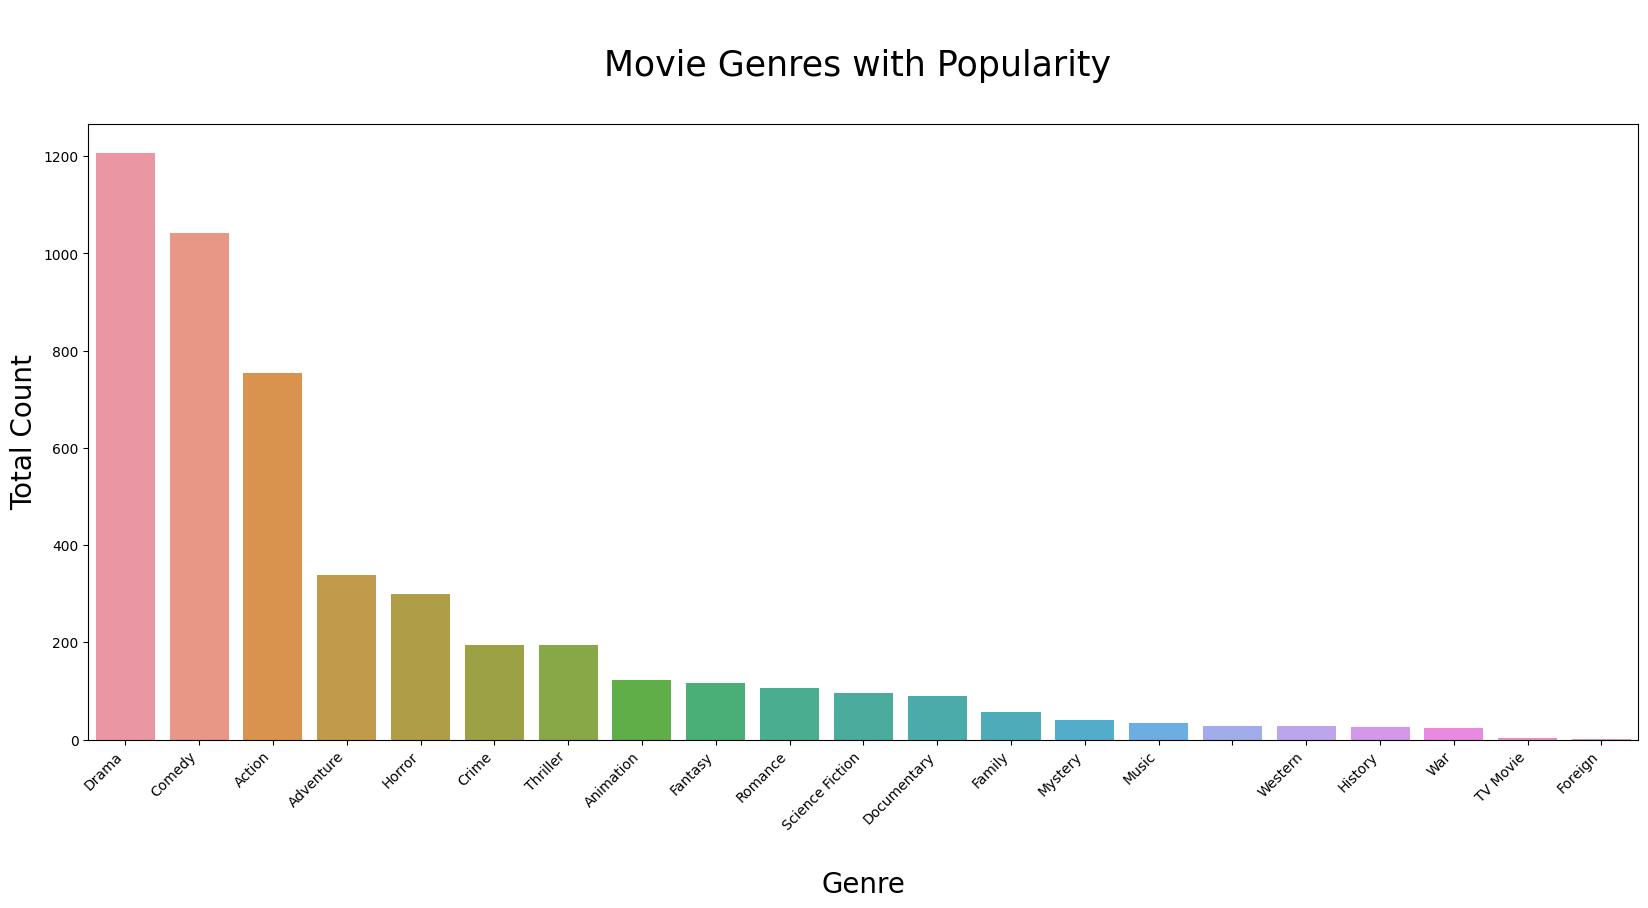

In [23]:
# Create a new DataFrame to count genre occurrences
genre_counts = df['genres'].str.split(', ', expand=True).stack().value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

# Sort the genres based on the count in descending order
genre_counts = genre_counts.sort_values(by='Count', ascending=False)
# Calculate popularity for each genre
genre_ratings = df.groupby('genres')['popularity'].mean().reset_index()

# Merge count and average rating data
genre_data2 = genre_counts.merge(genre_ratings, left_on='Genre', right_on='genres', how='left')

# Plotting the grouped bar chart
plt.subplots(figsize=(20, 8))
popularity_plot = sns.barplot(x=genre_data2['Genre'], y=genre_data2['Count'])
popularity_plot.axes.set_title("\nMovie Genres with Popularity \n", fontsize=25)
plt.ylabel("Total Count", fontsize=20)
plt.xlabel("\nGenre", fontsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [24]:
# replacing the null valuess with null string
for feature in df:
  df[feature] = df[feature].fillna('')

In [25]:
df.tail(3)

,genres,id,keywords,original_title,overview,popularity,tagline,title,vote_average,index
4800,Comedy,231617,"date,love at first sight,narration,investigati...","Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,,"Signed, Sealed, Delivered",7.0,4800
4801,,126186,,Shanghai Calling,When ambitious New York attorney Sam is sent t...,0.857008,A New Yorker in Shanghai,Shanghai Calling,5.7,4801
4802,Documentary,25975,"obsession,camcorder,crush,dream girl",My Date with Drew,Ever since the second grade when he first saw ...,1.929883,,My Date with Drew,6.3,4802


In [26]:
# selecting the relevant features for recommendation
selected_features = ['genres','keywords','original_title','overview','tagline']
print(selected_features)

['genres', 'keywords', 'original_title', 'overview', 'tagline']


In [27]:
# combining all the 5 selected features
combined_features = df['genres']+' '+df['keywords']+' '+df['original_title']+' '+df['overview']+' '+df['tagline']

In [28]:
combined_features

0       Action culture clash,future,space war,space co...
1       Adventure ocean,drug abuse,exotic island,east ...
2       Action spy,based on novel,secret agent,sequel,...
3       Action dc comics,crime fighter,terrorist,secre...
4       Action based on novel,mars,medallion,space tra...
                              ...                        
4798    Action united states–mexico barrier,legs,arms,...
4799    Comedy  Newlyweds A newlywed couple's honeymoo...
4800    Comedy date,love at first sight,narration,inve...
4801      Shanghai Calling When ambitious New York att...
4802    Documentary obsession,camcorder,crush,dream gi...
Length: 4803, dtype: object

In [29]:
# converting the text data to feature vectors
vectorizer = TfidfVectorizer()

In [30]:
feature_vectors = vectorizer.fit_transform(combined_features)

In [31]:
print(feature_vectors)

  (0, 15472)	0.026581076611802007
  (0, 24422)	0.06090242818929626
  (0, 7503)	0.12180427772238618
  (0, 4211)	0.13663443333722933
  (0, 1064)	0.04478514950495332
  (0, 17327)	0.1421507881897409
  (0, 15668)	0.1376297473057765
  (0, 8663)	0.11782254650475697
  (0, 2434)	0.08497977210804239
  (0, 22407)	0.12861772012115658
  (0, 2223)	0.08363158496271156
  (0, 3305)	0.0528381363527062
  (0, 14350)	0.08919603017478447
  (0, 23146)	0.13225277660721524
  (0, 15564)	0.04035924168995884
  (0, 16011)	0.31151603427320196
  (0, 14532)	0.1292969959658532
  (0, 22313)	0.026265604348189597
  (0, 6466)	0.15350378760687333
  (0, 11655)	0.03552457113812912
  (0, 16063)	0.1644331020511435
  (0, 3826)	0.10033823584780129
  (0, 242)	0.1683339432217165
  (0, 22066)	0.06956252546047356
  (0, 11097)	0.03067116796739955
  :	:
  (4802, 9870)	0.09334725286849074
  (4802, 24071)	0.09205092591932743
  (4802, 7742)	0.0841040588001301
  (4802, 15525)	0.06797163533561602
  (4802, 24562)	0.070012983879055
  (4802, 

In [32]:
# getting the similarity scores using cosine similarity
similarity = cosine_similarity(feature_vectors)

In [33]:
print(similarity)

[[1.         0.03756517 0.01604199 ... 0.02670148 0.01965638 0.0077323 ]
 [0.03756517 1.         0.03402181 ... 0.05784484 0.04162551 0.01983847]
 [0.01604199 0.03402181 1.         ... 0.02573465 0.01214929 0.01631753]
 ...
 [0.02670148 0.05784484 0.02573465 ... 1.         0.03258644 0.04312417]
 [0.01965638 0.04162551 0.01214929 ... 0.03258644 1.         0.03946756]
 [0.0077323  0.01983847 0.01631753 ... 0.04312417 0.03946756 1.        ]]


In [34]:
print(similarity.shape)

(4803, 4803)


In [37]:
# getting the movie name from the user
movie_name = input(' Enter your favourite movie name : ')

# creating a list with all the movie names given in the dataset
list_of_all_titles = df['title'].tolist()

# finding the close match for the movie name given by the user
find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)
close_match = find_close_match[0]

# finding the index of the movie with title
index_of_the_movie = df[df.title == close_match]['index'].values[0]

# getting a list of similar movies
similarity_score = list(enumerate(similarity[index_of_the_movie]))
sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True)

print('Movies suggested for you : \n')

# print the name of similar movies based on the index
i = 1
for movie in sorted_similar_movies:
  index = movie[0]
  title_from_index = df[df.index==index]['title'].values[0]
  if (i<30):
    print(i, '.',title_from_index)
    i+=1

 Enter your favourite movie name : Iron Man
Movies suggested for you : 

1 . Iron Man
2 . Iron Man 3
3 . Iron Man 2
4 . Avengers: Age of Ultron
5 . Captain America: Civil War
6 . The Incredible Hulk
7 . The Avengers
8 . Ant-Man
9 . Guardians of the Galaxy
10 . Captain America: The First Avenger
11 . Thor: The Dark World
12 . X-Men
13 . Super
14 . X-Men: Apocalypse
15 . Thor
16 . Captain America: The Winter Soldier
17 . Fantastic Four
18 . Cradle 2 the Grave
19 . The Wolverine
20 . X-Men: The Last Stand
21 . X-Men: Days of Future Past
22 . Chasing Amy
23 . Spider-Man 2
24 . The Little Vampire
25 . X-Men: First Class
26 . Deadpool
27 . Mystery Men
28 . X-Men Origins: Wolverine
29 . Spider-Man
